In [7]:
import math
import PIL
import extcolors
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib import gridspec

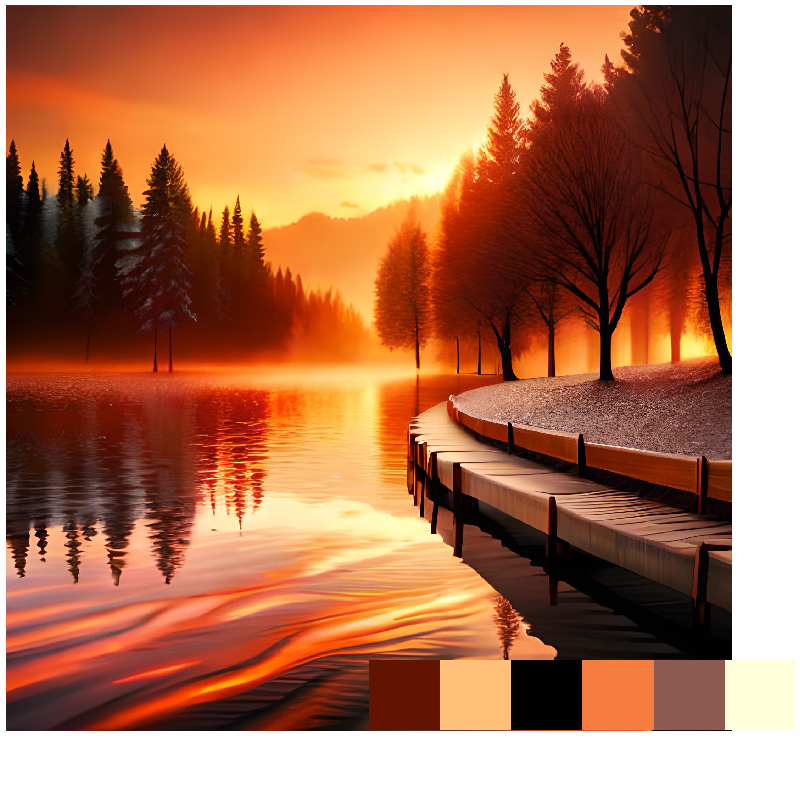

In [8]:

def fetch_image(image_path):
  img = PIL.Image.open(image_path)
  return img

def extract_colors(img):
  tolerance = 32
  limit = 6
  colors, pixel_count = extcolors.extract_from_image(img, tolerance, limit)
  return colors

def render_color_platte(colors):
  size = 100
  columns = 6
  width = int(min(len(colors), columns) * size)
  height = int((math.floor(len(colors) / columns) + 1) * size)
  result = Image.new("RGBA", (width, height), (0, 0, 0, 0))
  canvas = ImageDraw.Draw(result)
  for idx, color in enumerate(colors):
      x = int((idx % columns) * size)
      y = int(math.floor(idx / columns) * size)
      canvas.rectangle([(x, y), (x + size - 1, y + size - 1)], fill=color[0])
  return result

def overlay_palette(img, color_palette):
  nrow = 2
  ncol = 1
  f = plt.figure(figsize=(20,30), facecolor='None', edgecolor='k', dpi=55, num=None)
  gs = gridspec.GridSpec(nrow, ncol, wspace=0.0, hspace=0.0) 
  f.add_subplot(2, 1, 1)
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  f.add_subplot(1, 2, 2)
  plt.imshow(color_palette, interpolation='nearest')
  plt.axis('off')
  plt.subplots_adjust(wspace=0, hspace=0, bottom=0)
  plt.show(block=True)

def study_image(image_path):
  img = fetch_image(image_path)
  colors = extract_colors(img)
  color_palette = render_color_platte(colors)
  overlay_palette(img, color_palette)

study_image("test3.jpg")

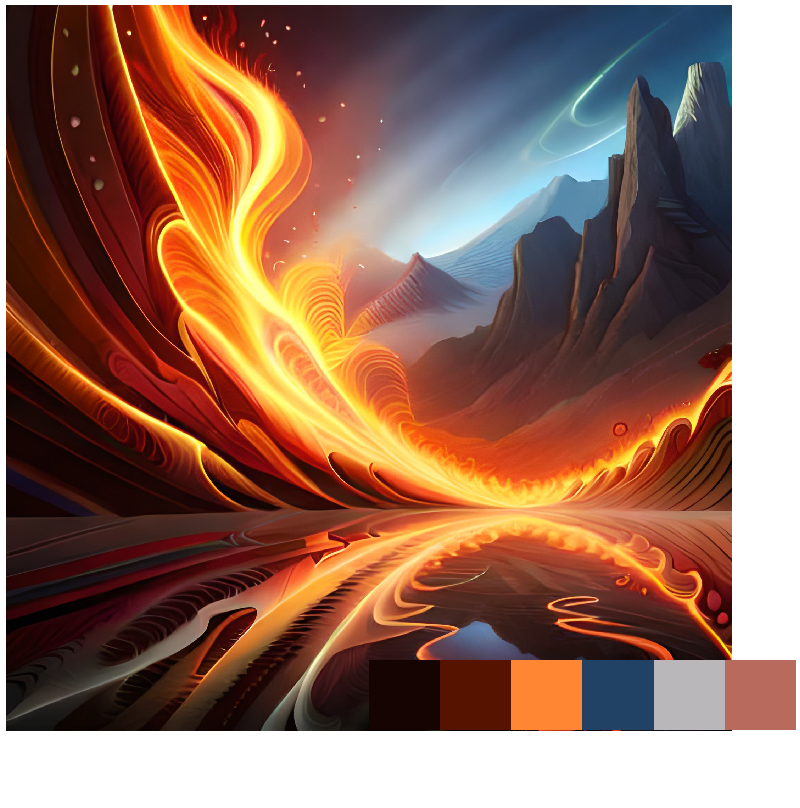

In [9]:
study_image("test4.jpg")
study_image("test5.jpg")